## Sorting algorithms
The following code block are the sorting algorithms and helper methods for sorting data

In [6]:
import time
import random
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import csv
from array import array
import seaborn as sns
from tqdm.notebook import tqdm


In [23]:
def merge_sort_helper(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort_helper(arr[:mid])
    right = merge_sort_helper(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def quick_sort_helper(arr):
    if len(arr) <= 1:
        return arr
    #pivot = arr[len(arr) // 2]
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort_helper(left) + middle + quick_sort_helper(right)

def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[largest] < arr[left]:
        largest = left

    if right < n and arr[largest] < arr[right]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i:][0]

def bubble_sort(data):
    if isinstance(data, tuple) or isinstance(data, set):
        data = list(data)

    n = len(data)
    for i in range(n):
        for j in range(0, n - i - 1):
            if data[j] > data[j + 1]:
                data[j], data[j + 1] = data[j + 1], data[j]
    return data

def insertion_sort(data):
    if isinstance(data, tuple) or isinstance(data, set):
        data = list(data)
    for i in range(1, len(data)):
        key = data[i]
        j = i - 1
        while j >= 0 and key < data[j]:
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = key
    return data

def merge_sort(data):
    if isinstance(data, (tuple, set, pd.Series)):
        data = list(data)
    return merge_sort_helper(data)
"""
def quick_sort(data):
    if isinstance(data, tuple) or isinstance(data, set):
        data = list(data)
    return quick_sort_helper(data)
"""
def quick_sort(data):
    if isinstance(data, tuple) or isinstance(data, set):
        data = list(data)

    stack = [(0, len(data) - 1)]

    while stack:
        start, end = stack.pop()
        if start >= end:
            continue

        pivot = data[end]
        i = start
        for j in range(start, end):
            if data[j] < pivot:
                data[i], data[j] = data[j], data[i]
                i += 1
        data[i], data[end] = data[end], data[i]

        stack.append((start, i - 1))
        stack.append((i + 1, end))
    return data

def heap_sort(data):
    if isinstance(data, tuple) or isinstance(data, set):
        data = list(data)
    n = len(data)
    for i in range(n // 2 - 1, -1, -1):
        heapify(data, n, i)

    for i in range(n - 1, 0, -1):
        data[0], data[i] = data[i], data[0]
        heapify(data, i, 0)
    return data

def radix_sort(data):
    if isinstance(data, tuple) or isinstance(data, set):
        data = list(data)
    if len(data) == 0:
        return data

    max_num = max(data)
    exp = 1
    while max_num // exp > 0:
        counting_sort(data, exp)
        exp *= 10
    return data

def bucket_sort(data):
    #Must convert np array and pd Series to list because they
    #dont have clear and extend methods
    #Thats ok, just another quirk of the data the model will have to predict
    if isinstance(data, (tuple, set, np.ndarray, pd.Series)):
        data = list(data)
    if len(data) == 0:
        return data

    min_value = min(data)
    max_value = max(data)
    bucket_count = len(data)
    buckets = [[] for _ in range(bucket_count)]

    for num in data:
        index = int((num - min_value) * (bucket_count - 1) / (max_value - min_value))
        buckets[index].append(num)

    data.clear()
    for bucket in buckets:
        insertion_sort(bucket)
        data.extend(bucket)
    return data

## Methods to load our data from csv files

In [24]:
def load_data():
    with open('./data/data_no_pandas.csv', 'r') as data_file:
        reader = csv.reader(data_file)
        matrix = [row for row in reader]
    return matrix

def load_features():
    with open('./data/features_no_pandas.csv', 'r') as data_file:
        reader = csv.reader(data_file)
        matrix = [row for row in reader]
    return matrix

def convert_to_data_type():
    features = load_features()
    data = load_data()
    converted_data = data.copy()
    for j in range(0, len(features)):
        if features[j][4] == '1':
            pass
            #TODO: Fix
            #converted_data[j] = array(data[j])
        elif features[j][5] == '1':
            converted_data[j] = list(data[j])
        elif features[j][6] == '1':
            converted_data[j] = tuple(data[j])
        elif features[j][7] == '1':
            converted_data[j] = set(data[j])
        elif features[j][8] == '1':
            converted_data[j] = np.array(data[j])
        #elif features[j][9] == '1':
        #    converted_data[j] = pd.Series(data[j])
    
        if isinstance(converted_data[j], np.ndarray):
            converted_data[j] = converted_data[j].astype(int)
        elif isinstance(converted_data[j], list):
            converted_data[j] = [int(x) for x in converted_data[j]]
        elif isinstance(converted_data[j], tuple):
            converted_data[j] = tuple(int(x) for x in converted_data[j])
        elif isinstance(converted_data[j], set):
            converted_data[j] = set(int(x) for x in converted_data[j])
        #elif isinstance(converted_data[j], pd.Series):
        #    converted_data[j] = converted_data[j].astype(int)
        else:
            raise TypeError(f"Unsupported data type: {type(converted_data[j])}")


    return converted_data


## Methods to record and display results of sorting algorithms

Running on 10 collections without multiprocessing takes: 1 min 45 seconds (105 seconds)

Running on 100 collections without multiprocessing takes: 


In [ ]:
def time_sort():
    timing_data = []
    data = convert_to_data_type()

    outer_bar = tqdm(range(len(data)), desc="Datasets", unit="dataset", position=0)

    for i in outer_bar:
        dataset_results = {}
        dataset_results["Dataset"] = f"Dataset {i+1}"
        current_data = data[i]

        sorts = [
            ("Bubble", bubble_sort),
            ("Insertion", insertion_sort),
            ("Merge", merge_sort),
            ("Quick", quick_sort),
            ("Heap", heap_sort),
            ("Radix", radix_sort),
            ("Bucket", bucket_sort),
        ]

        inner_bar = tqdm(sorts, desc=f"Sorting Dataset {i+1}", unit="sort", position=1, leave=False)

        for sort_name, sort_fn in inner_bar:
            start = time.perf_counter()
            sort_fn(current_data)
            end = time.perf_counter()
            dataset_results[sort_name] = end - start

        timing_data.append(dataset_results)

    return pd.DataFrame(timing_data)

df = time_sort()

df = df.drop(df.columns[0], axis=1)
df.columns = range(df.shape[1])
df = df.map(lambda x: round(x, 5) if isinstance(x, (int, float)) else x)

existing_df = pd.read_csv("./data/features_no_pandas.csv")

combined_df = pd.concat([existing_df, df], axis=1)

combined_df.to_csv("./data/features_no_pandas.csv", index=False, header=False)


## Creating scatter plots to visualize data

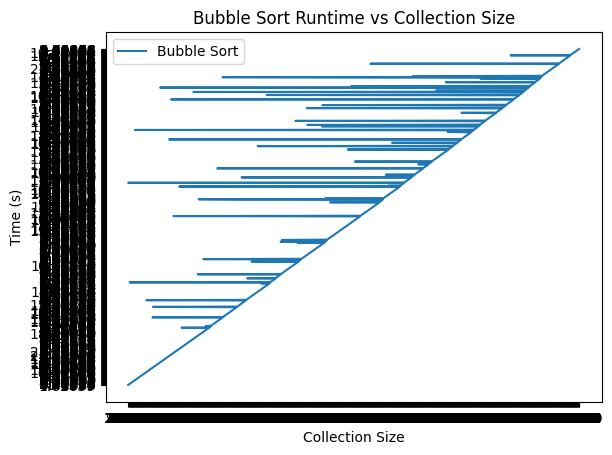

C:\Users\aborc\AppData\Local\Temp\ipykernel_37968\194737152.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_title("")
C:\Users\aborc\AppData\Local\Temp\ipykernel_37968\194737152.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_title("")
C:\Users\aborc\AppData\Local\Temp\ipykernel_37968\194737152.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_title("")
C:\Users\aborc\AppData\Local\Temp\ipykernel_37968\194737152.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legen

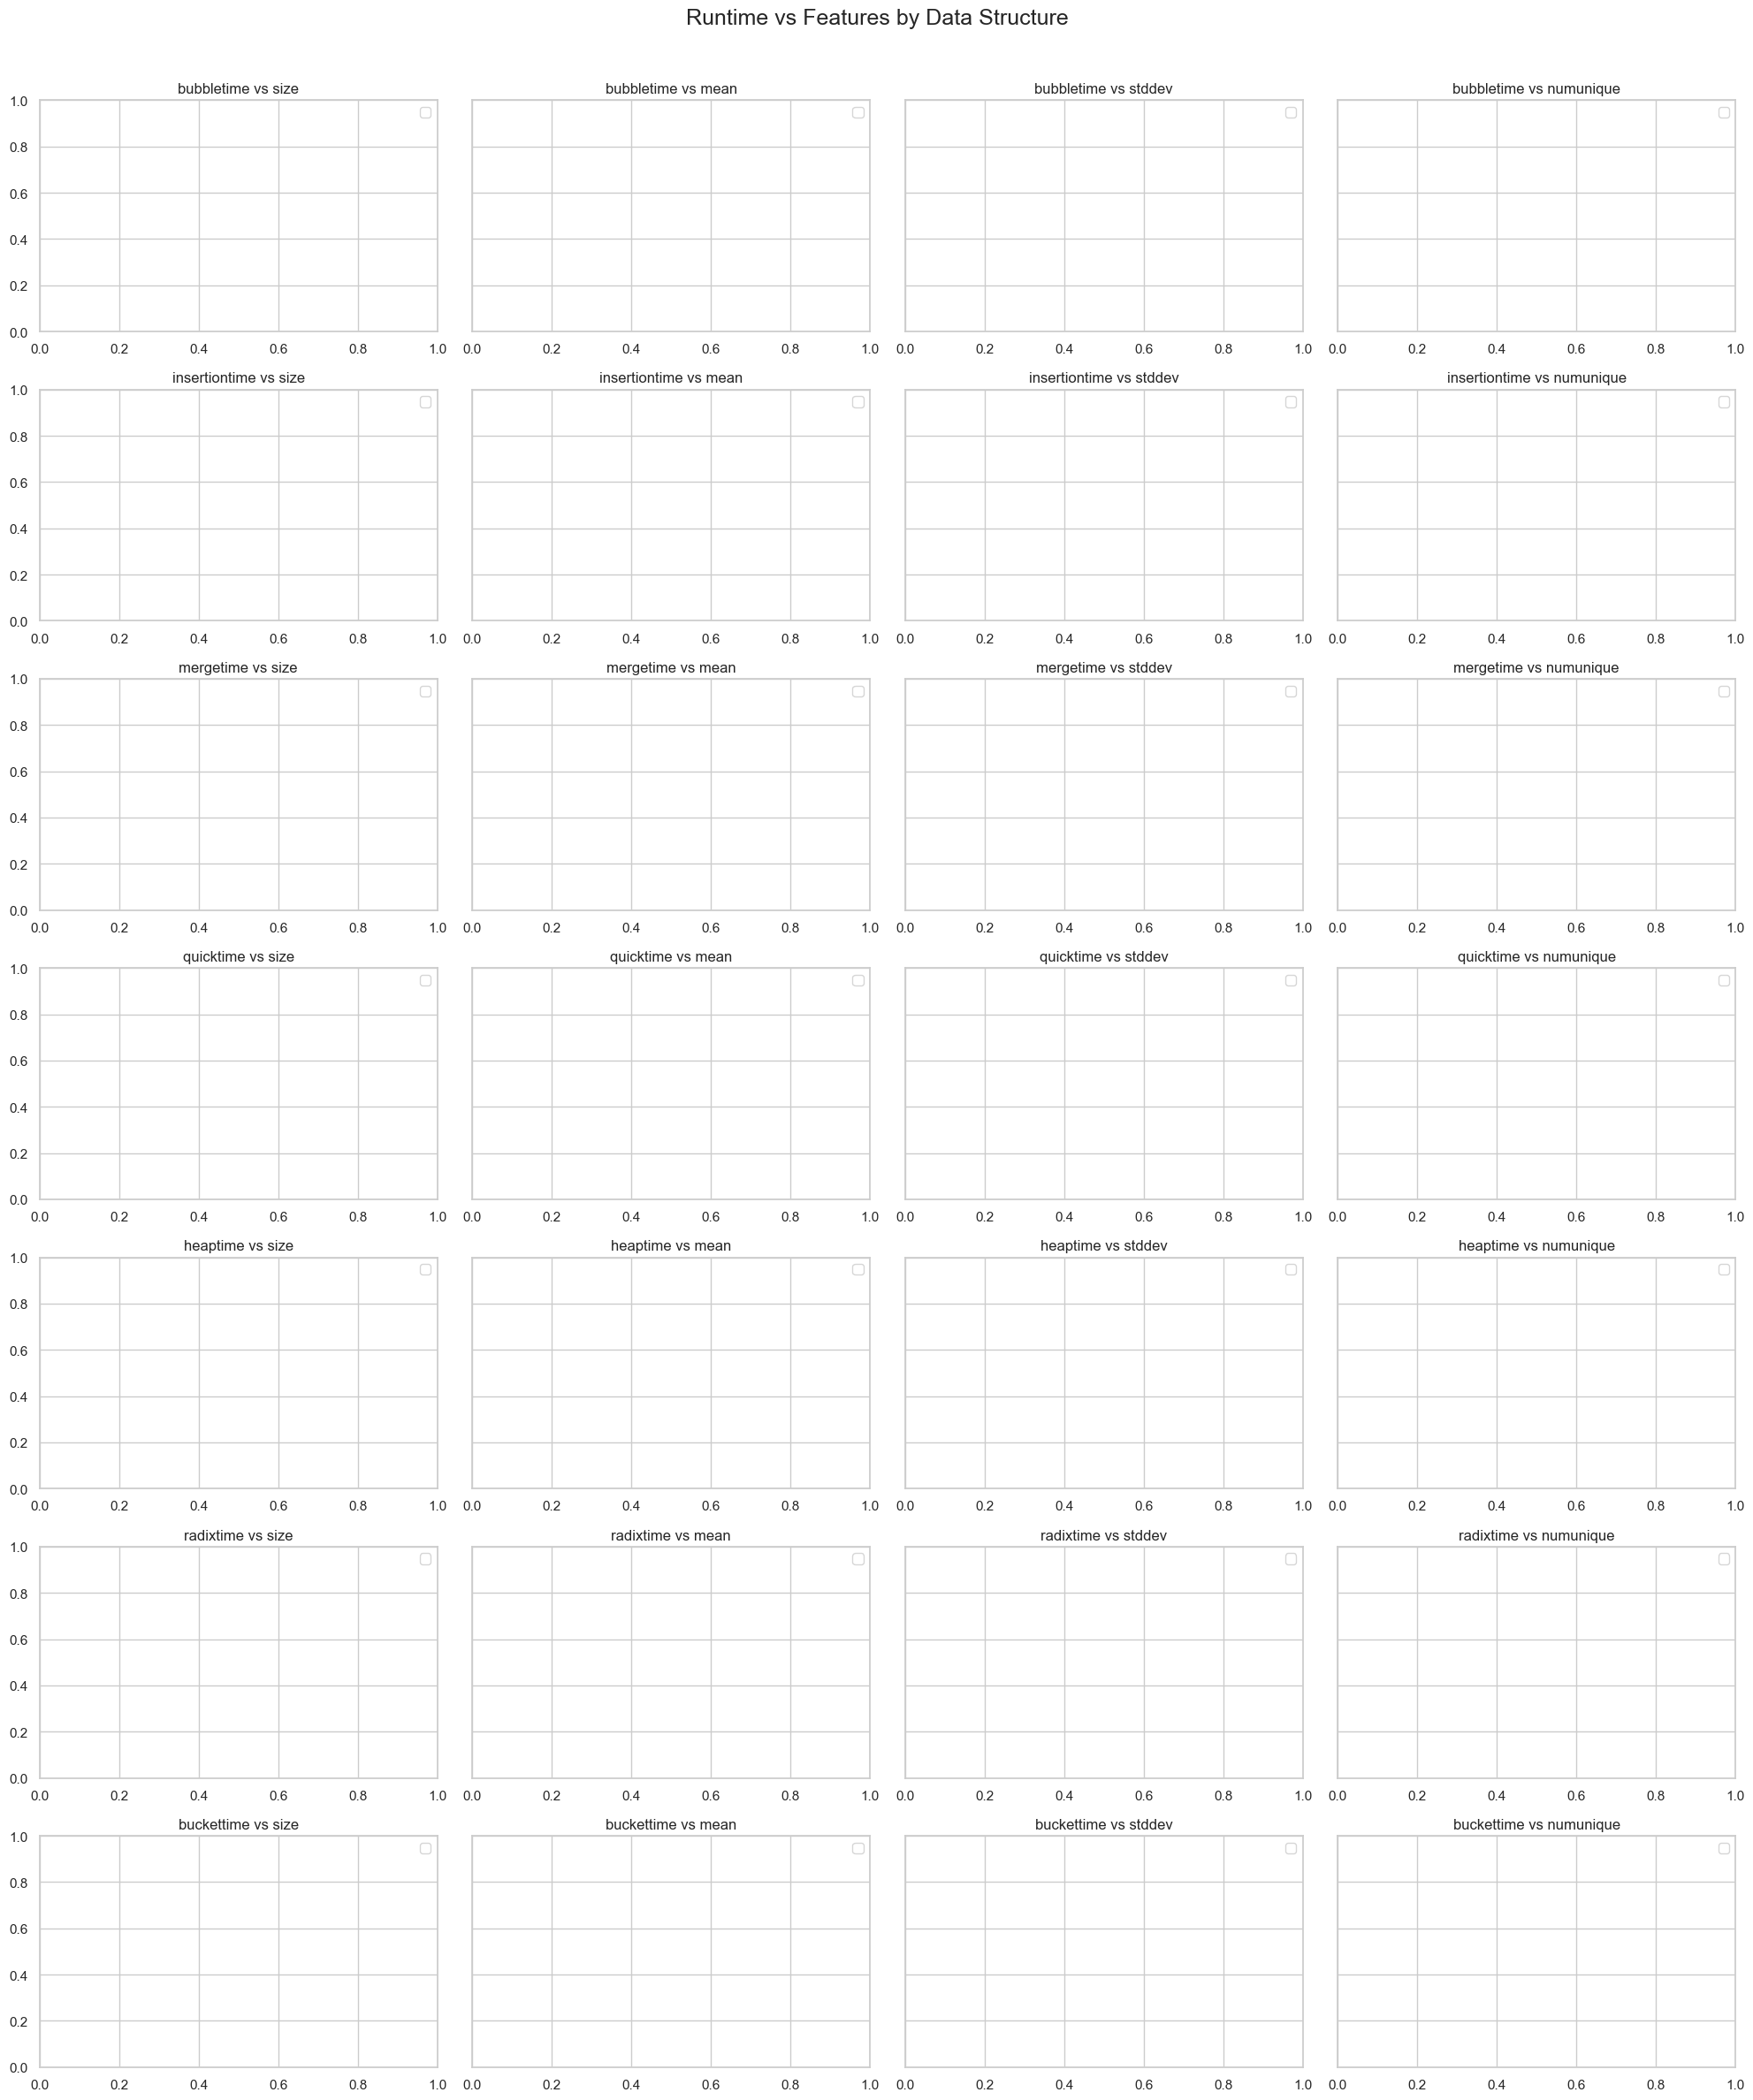

In [ ]:

df = pd.read_csv("./data/labels_no_pandas.csv")

def get_structure_type(row):
    if row['arrayvalue'] == 1:
        return 'array'
    elif row['listvalue'] == 1:
        return 'list'
    elif row['tuplevalue'] == 1:
        return 'tuple'
    elif row['setvalue'] == 1:
        return 'set'
    elif row['nparrayvalue'] == 1:
        return 'nparray'
    return 'unknown'

df['structure'] = df.apply(get_structure_type, axis=1)

features = ["size", "mean", "stddev", "numunique"]
algorithms = [
    "Bubble Sort", "Insertion Sort", "Merge Sort", "Quick Sort",
    "Heap Sort", "Radix Sort", "Bucket Sort"
]

sns.set_theme(style="whitegrid", palette="deep")
fig, axes = plt.subplots(len(algorithms), len(features), figsize=(20, 25), sharey='row')
fig.suptitle("Runtime vs Features by Data Structure", fontsize=18)

for i, algo in enumerate(algorithms):
    for j, feat in enumerate(features):
        ax = axes[i, j]
        sns.scatterplot(
            data=df, x=feat, y=algo, hue="structure", ax=ax, s=50, alpha=0.8
        )
        ax.set_title(f"{algo} vs {feat}")
        ax.legend().set_title("")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()





CSV Columns: ['Size', 'Mean', 'StandardDeviation', 'NumUnique', 'arrayvalue', 'listvalue', 'tuplevalue', 'setvalue', 'nparrayvalue', 'BubbleSort', 'InsertionSort', 'MergeSort', 'QuickSort', 'HeapSort', 'RadixSort', 'BucketSort']


ValueError: Could not interpret value `Structure` for `hue`. An entry with this name does not appear in `data`.

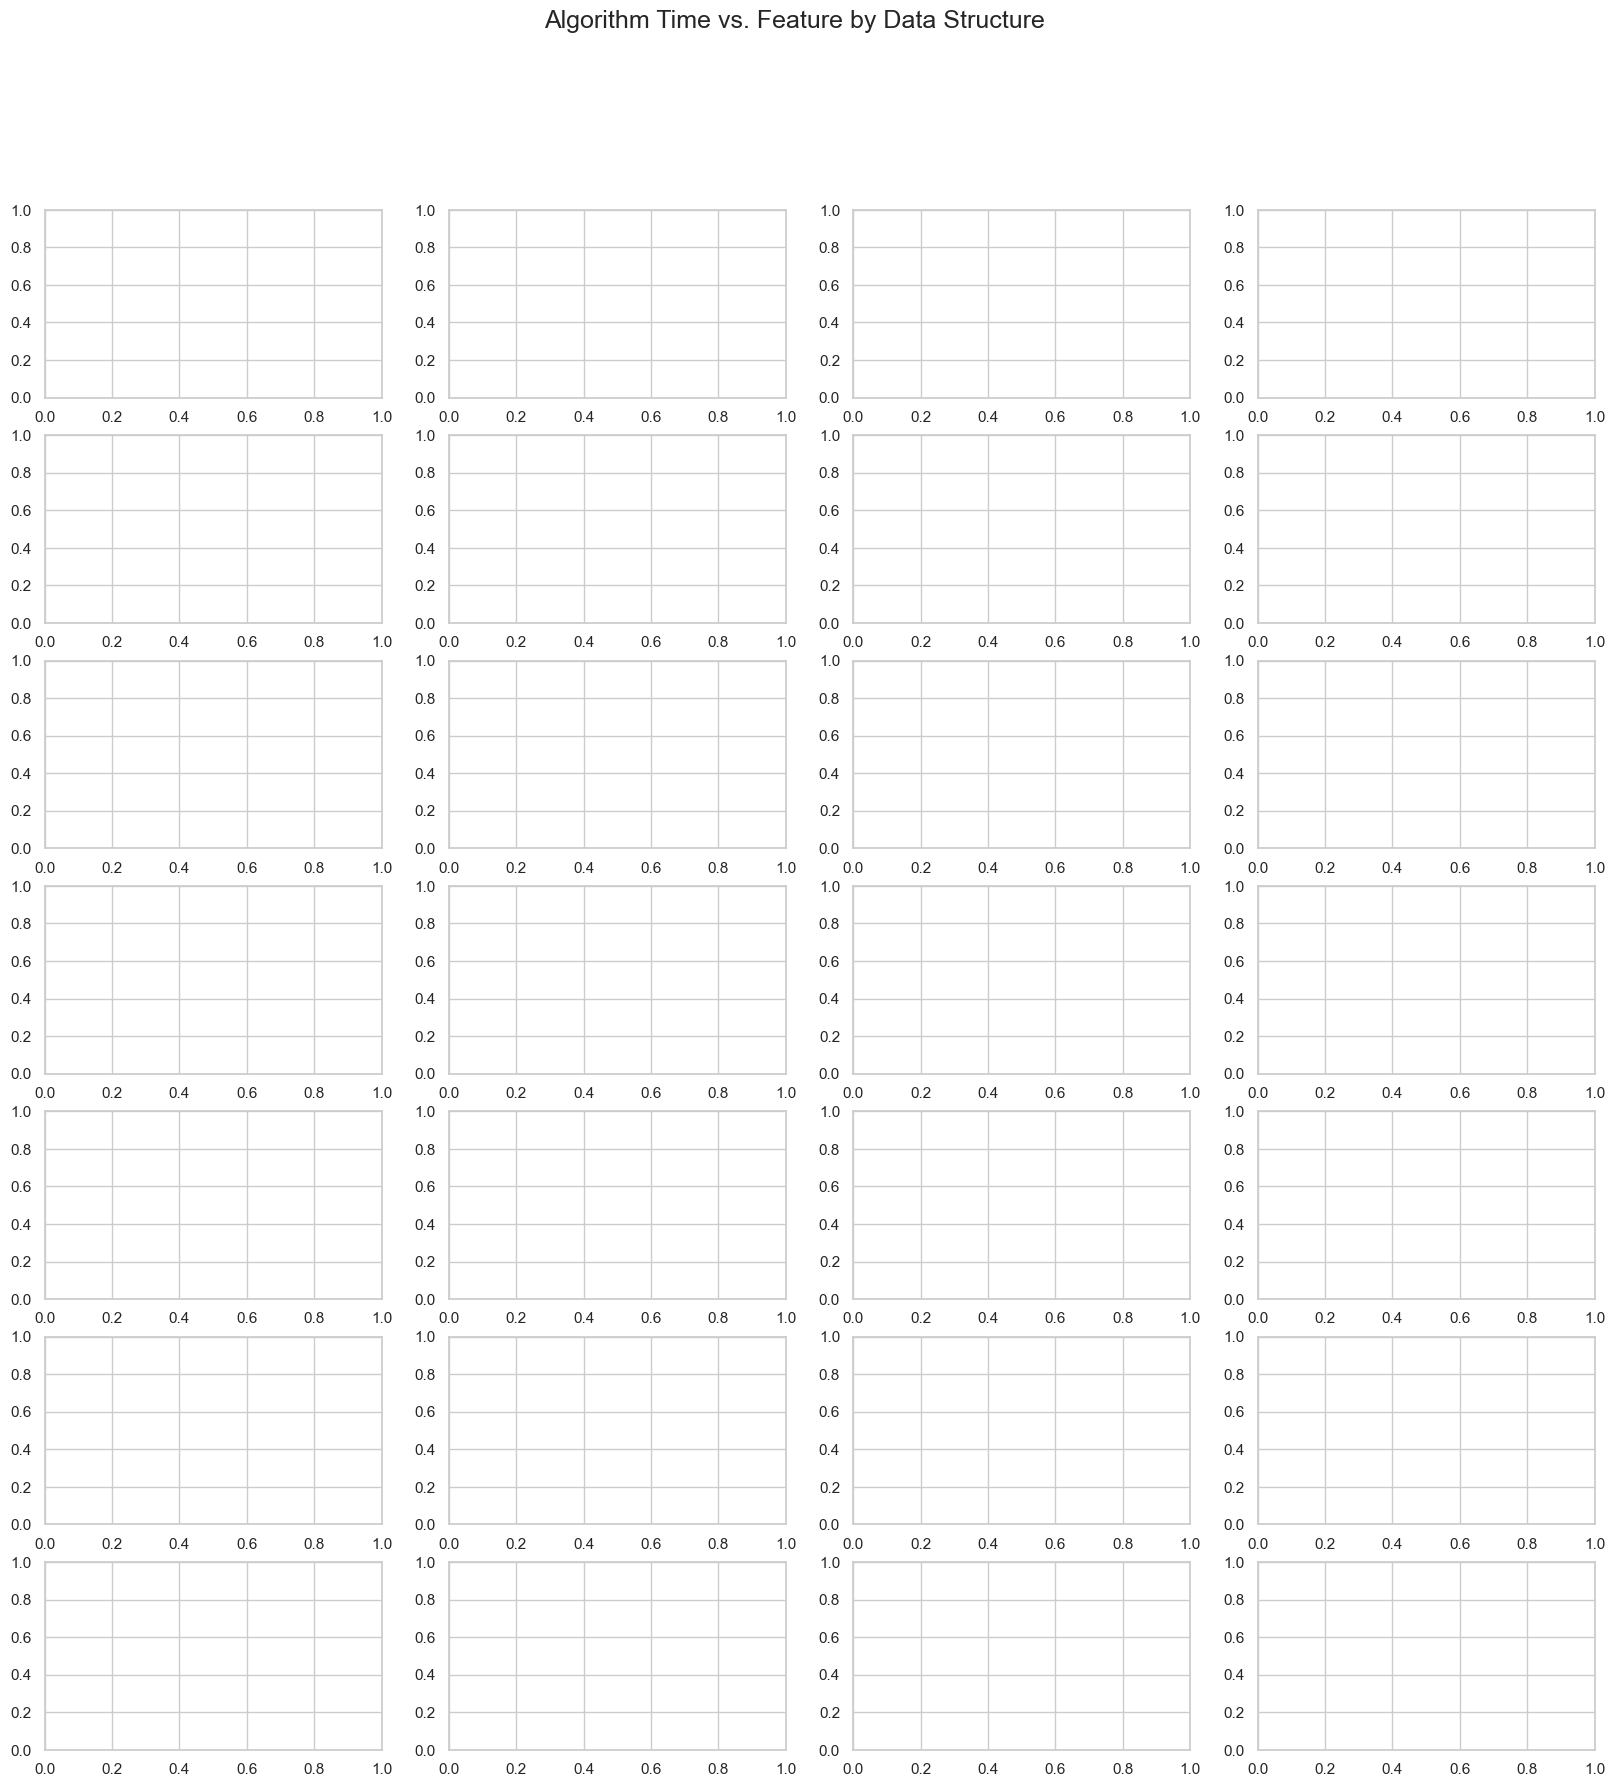

In [ ]:
# Load the actual CSV data
df = pd.read_csv("./data/features_no_pandas.csv")  # replace with your real filename

# Sanity check — print columns
print("CSV Columns:", df.columns.tolist())

# Define features and algorithms
features = ["Size","Mean","StandardDeviation","NumUnique"]
algorithms = ["BubbleSort","InsertionSort","MergeSort","QuickSort","HeapSort","RadixSort","BucketSort"]

# Determine structure type based on the 1.0 position in the structure columns
def get_structure_type(row):
    if row["arrayvalue"] == 1.0:
        return "array"
    elif row["listvalue"] == 1.0:
        return "list"
    elif row["tuplevalue"] == 1.0:
        return "tuple"
    elif row["setvalue"] == 1.0:
        return "set"
    elif row["nparrayvalue"] == 1.0:
        return "nparray"
    else:
        return "unknown"

df["structure"] = df.apply(get_structure_type, axis=1)

# Set up the plot grid
fig, axes = plt.subplots(len(algorithms), len(features), figsize=(20, 20), sharey='col')
fig.suptitle("Algorithm Time vs. Feature by Data Structure", fontsize=18)

# Plot each combination
for i, algo in enumerate(algorithms):
    for j, feat in enumerate(features):
        ax = axes[i, j]
        sns.scatterplot(data=df, x=feat, y=algo, hue="structure", ax=ax)
        if i == 0:
            ax.set_title(feat)
        if j == 0:
            ax.set_ylabel(algo)
        else:
            ax.set_ylabel("")
        if i < len(algorithms) - 1:
            ax.set_xlabel("")
        else:
            ax.set_xlabel(feat)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()